In [1]:
! pip install squidpy

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of spatialdata to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 5.0 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of distributed to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of s3fs to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.5/390

In [2]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scanpy as sc
import squidpy as sq

sc.logging.print_header()

/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.23.4 scipy==1.12.0 pandas==2.2.0 scikit-learn==1.4.1.post1 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


In [7]:
receptors = sq.read.vizgen(path='', counts_file= 'cell_by_gene_S2R1.csv', meta_file= 'cell_metadata_S2R1.csv')
receptors

AnnData object with n_obs × n_vars = 83546 × 483
    obs: 'fov', 'volume', 'min_x', 'max_x', 'min_y', 'max_y'
    uns: 'spatial'
    obsm: 'blank_genes', 'spatial'

In [8]:
# quality control metrics
sc.pp.calculate_qc_metrics(receptors, percent_top=(50,100,200,300), inplace=True)

In [10]:
# the percentage of unassgined 'blank genes'
(receptors.obsm['blank_genes'].to_numpy().sum()/receptors.var['total_counts'].sum()) *100

0.37716233637183905

<Axes: title={'center': 'Transcripts per FOV'}, xlabel='total_counts', ylabel='Count'>

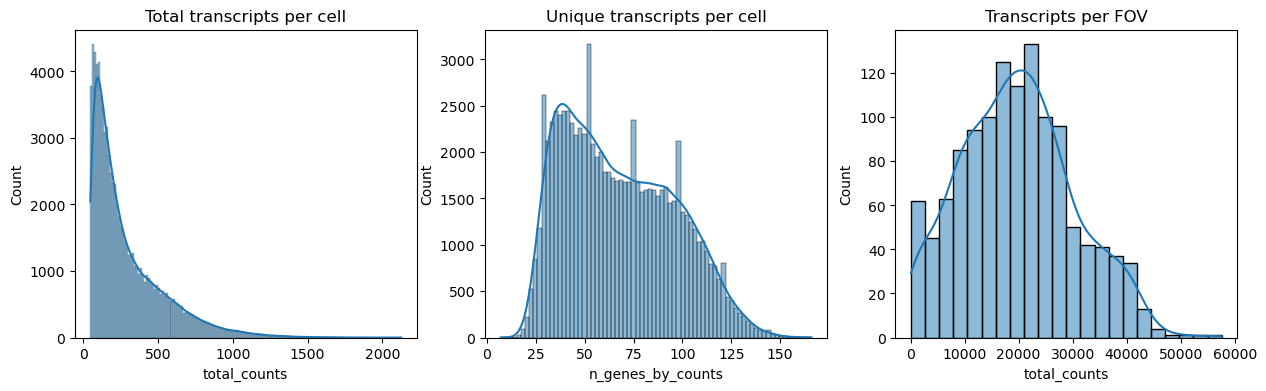

In [13]:
# distribution of total transcripts per cell. 
import seaborn as sns
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(receptors.obs['total_counts'], kde=True, ax=axs[0])

axs[1].set_title("Unique transcripts per cell")
sns.histplot(receptors.obs['n_genes_by_counts'], kde=True, ax=axs[1])

axs[2].set_title("Transcripts per FOV")
sns.histplot(receptors.obs.groupby('fov').sum()['total_counts'], kde=True, ax=axs[2])


In [14]:
# filter out cells with less than 10 counts
sc.pp.filter_cells(receptors, min_counts=10)

In [15]:
# Scanpy 
sc.pp.normalize_total(receptors, inplace=True) # normalize counts per cell

sc.pp.log1p(receptors) # log transform
sc.pp.pca(receptors)
sc.pp.neighbors(receptors) # neighbouring graph
sc.tl.umap(receptors) # embedding the neighbouring graph 
sc.tl.leiden(receptors, resolution=0.5) # clustering cells



/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/opt/anaconda3/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


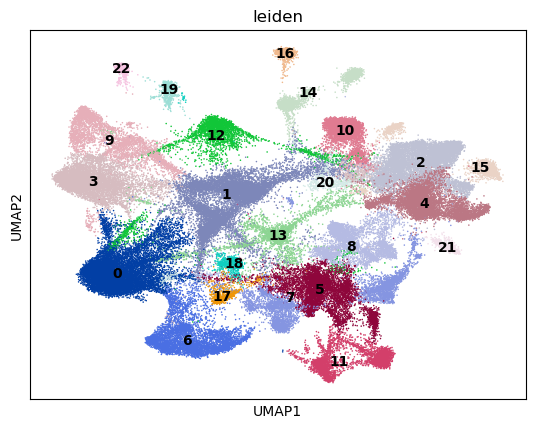

In [16]:
sc.pl.umap(receptors, color = 'leiden', legend_loc = 'on data', size =5, wspace = 0.5)

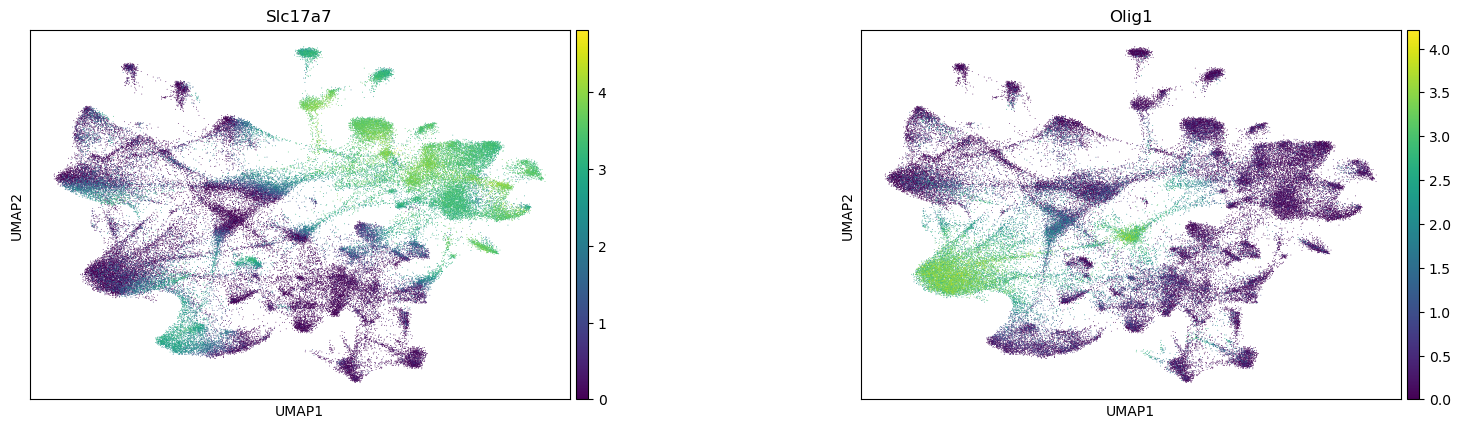

In [18]:
# markers for neurons and oligodendrocytes
sc.pl.umap(receptors, color = ['Slc17a7', 'Olig1'], wspace= 0.4)

/opt/anaconda3/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
/opt/anaconda3/lib/python3.9/site-packages/squidpy/pl/_spatial_utils.py:956: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


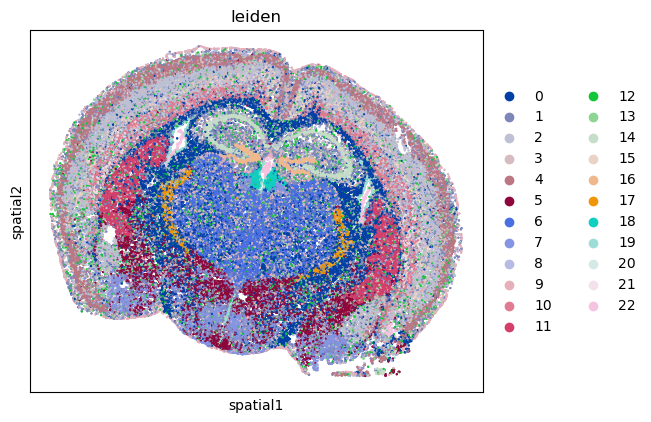

In [20]:
# spatial scattering
sq.pl.spatial_scatter(receptors, shape = None, color = ['leiden'], wspace = .4)

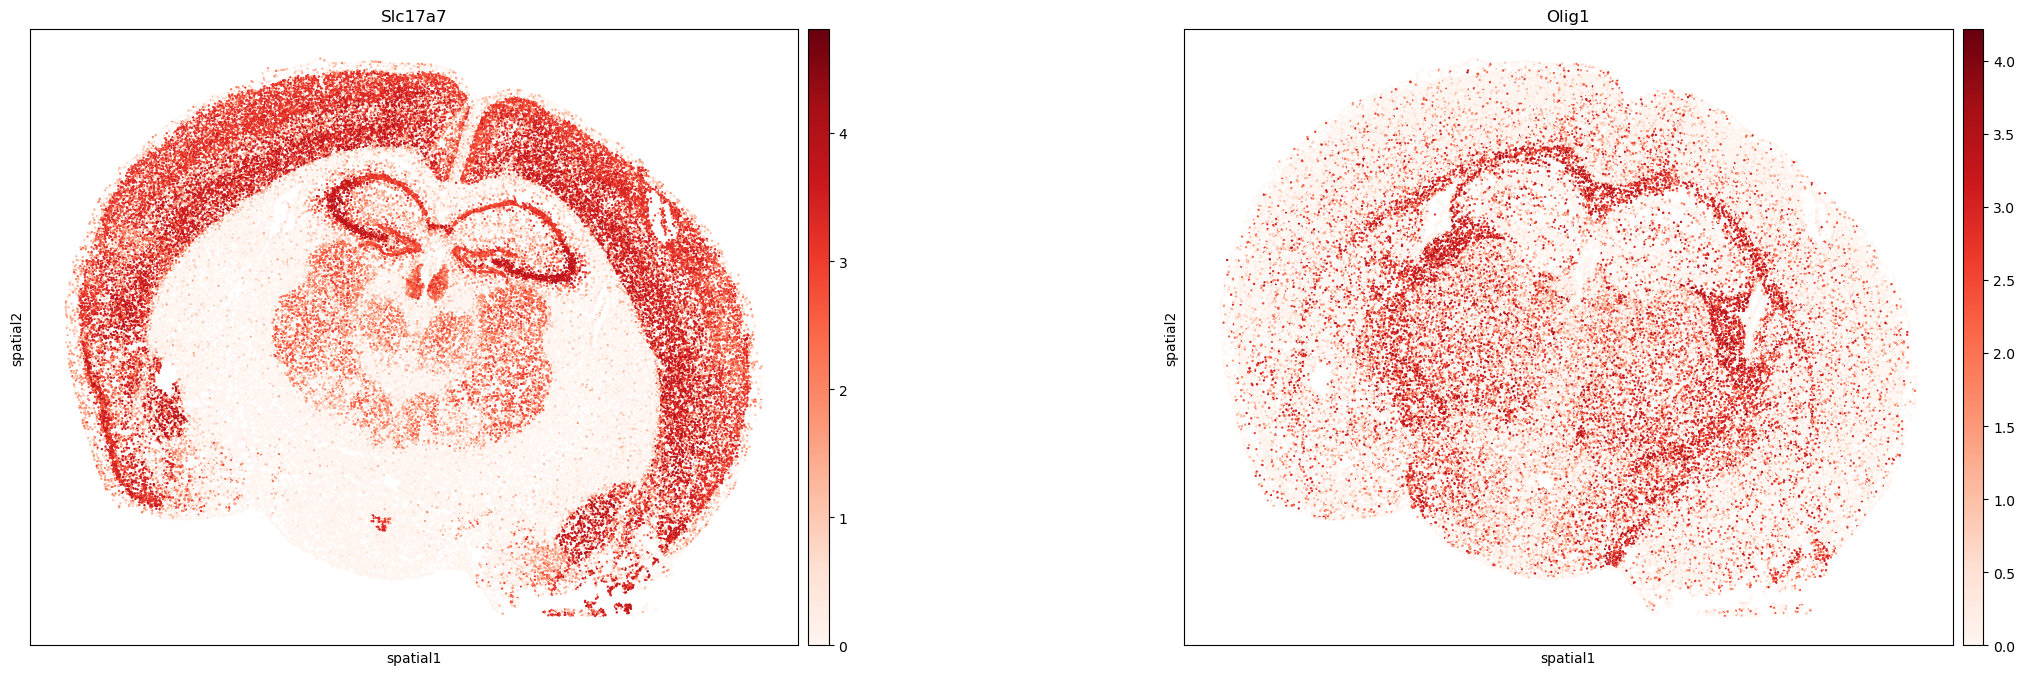

In [21]:
sq.pl.spatial_scatter(receptors, color = ['Slc17a7', 'Olig1'], size = 15, cmap = 'Reds', img = False, figsize = (12,8))

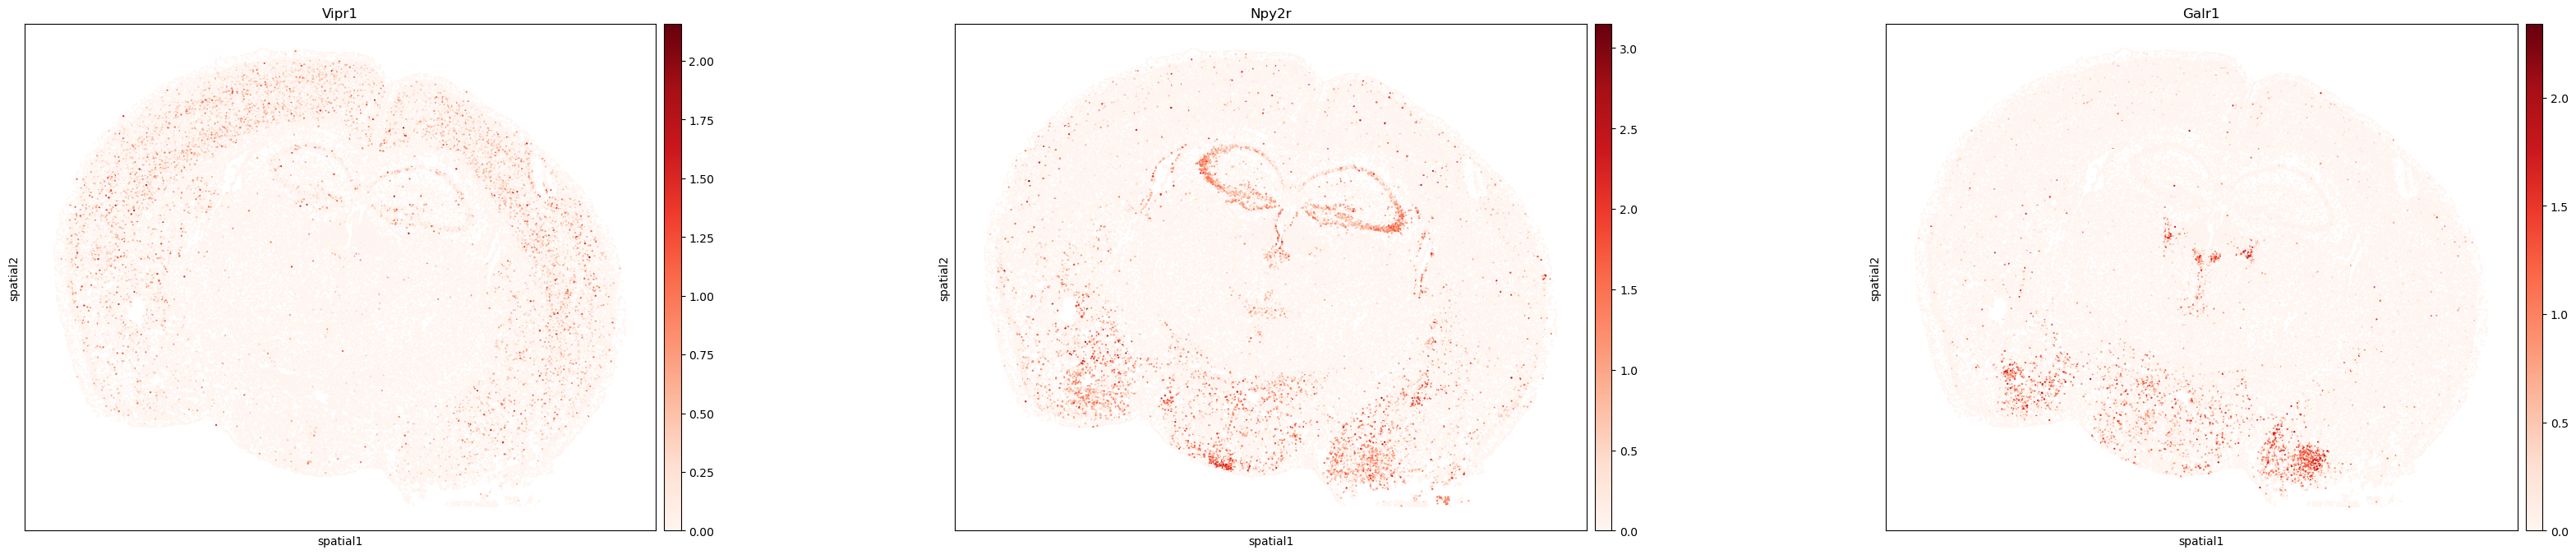

In [22]:
# receptors for neuropeptides
sq.pl.spatial_scatter(receptors, color = ['Vipr1', 'Npy2r', 'Galr1'], size = 15, cmap = 'Reds', img = False, figsize = (12,8))

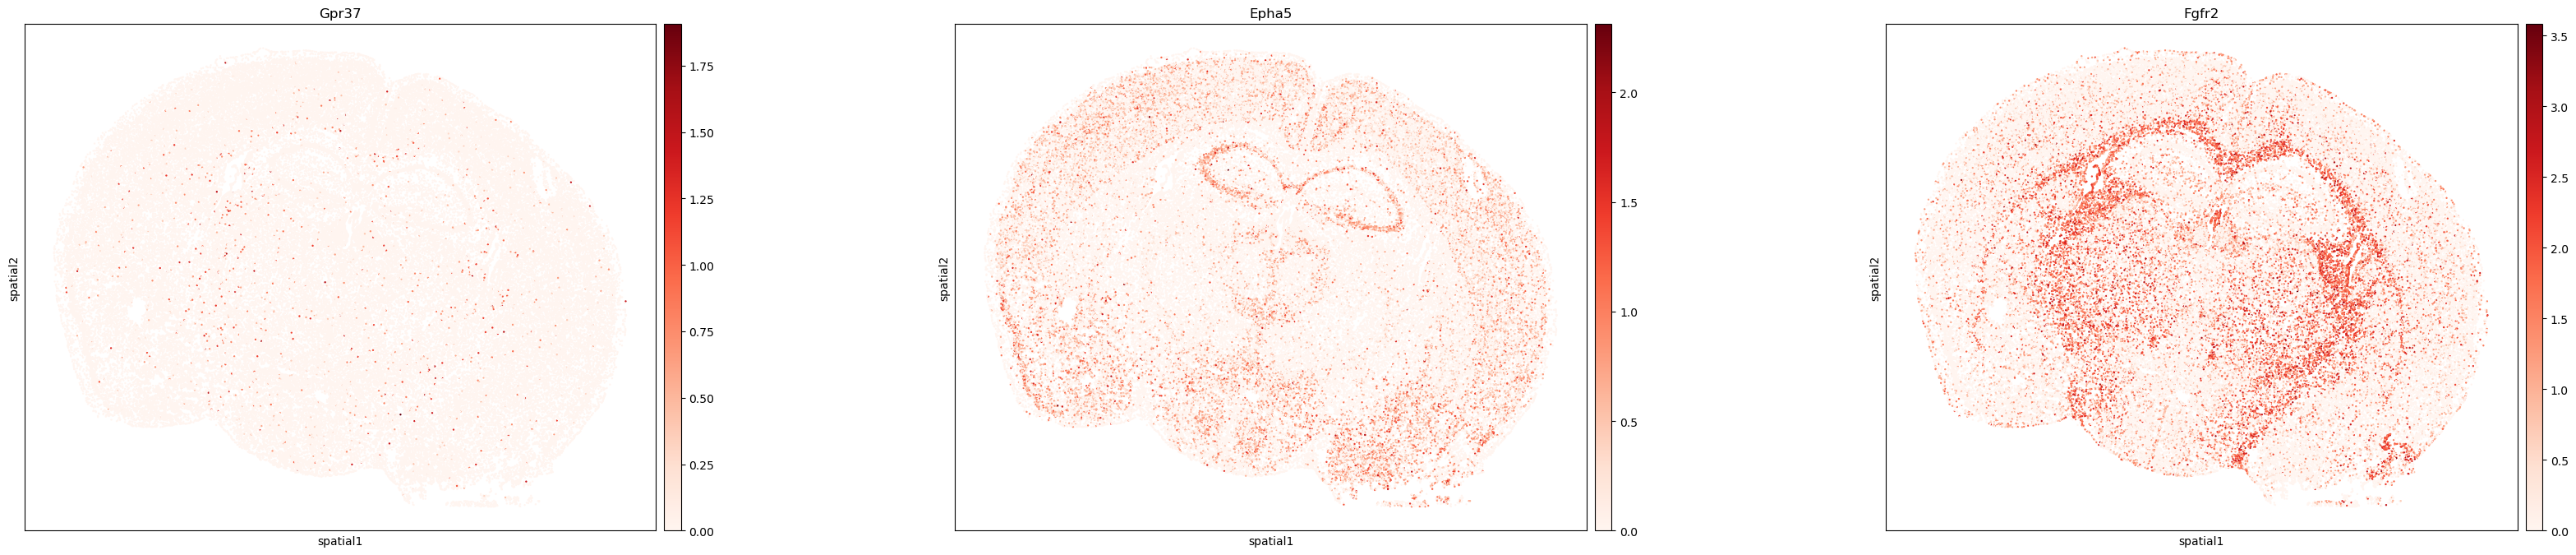

In [23]:
sq.pl.spatial_scatter(receptors, color = ['Gpr37', 'Epha5', 'Fgfr2'], size = 15, cmap = 'Reds', img = False, figsize = (12,8))

In [31]:
receptors.obs

fov       volume        min_x  \
149164679103246548309819743981609972453    22   702.985117   633.050640   
215843146921706462965382248182021894607    22  1601.521287   584.666639   
230248905804673613678286091156141465134    22   999.080438   589.202639   
237155298815097057940587033798543926454    22  1343.252320   606.482639   
256099454901769634241742157204636917386    22   791.421453   602.594639   
...                                       ...          ...          ...   
228664397583799424769953471170828485497  1362  1287.925067  9347.684827   
23913614753721247824828284819434942698   1362  1077.598116  9326.408826   
265242905022798846132446878658891240171  1362   724.988088  9336.344826   
323169293857992050739513584513532925918  1362  1926.005095  9339.584826   
188654480509734336181238235687866285740  1363  1134.117373  9297.569052   

                                               max_x        min_y  \
149164679103246548309819743981609972453   644.077440  4588.373644   
215843146921706462965382248182021894607   602.940239  4504.889642   
230248905804673613678286091156141465134   605.424239  4557.485643   
237155298815097057940587033798543926454   620.004239  4600.469645   
256099454901769634241742157204636917386   615.792239  4596.041644   
...                                              ...          ...   
228664397583799424769953471170828485497  9368.874427  4250.718208   
23913614753721247824828284819434942698   9342.738427  4381.722211   
265242905022798846132446878658891240171  9348.354427  4278.366209   
323169293857992050739513584513532925918  9361.422427  4388.202212   
188654480509734336181238235687866285740  9310.442652  4187.590819   

                                               max_y  n_genes_by_counts  \
149164679103246548309819743981609972453  4600.059245                 43   
215843146921706462965382248182021894607  4527.591243                 41   
230248905804673613678286091156141465134  4575.867244                 37   
237155298815097057940587033798543926454  4618.527245                 58   
256099454901769634241742157204636917386  4610.319245                 40   
...                                              ...                ...   
228664397583799424769953471170828485497  4269.639809                 34   
23913614753721247824828284819434942698   4402.479812                 30   
265242905022798846132446878658891240171  4291.779809                 27   
323169293857992050739513584513532925918  4409.283812                 63   
188654480509734336181238235687866285740  4206.944420                 38   

                                         log1p_n_genes_by_counts  \
149164679103246548309819743981609972453                 3.784190   
215843146921706462965382248182021894607                 3.737670   
230248905804673613678286091156141465134                 3.637586   
237155298815097057940587033798543926454                 4.077537   
256099454901769634241742157204636917386                 3.713572   
...                                                          ...   
228664397583799424769953471170828485497                 3.555348   
23913614753721247824828284819434942698                  3.433987   
265242905022798846132446878658891240171                 3.332205   
323169293857992050739513584513532925918                 4.158883   
188654480509734336181238235687866285740                 3.663562   

                                         total_counts  log1p_total_counts  \
149164679103246548309819743981609972453         112.0            4.727388   
215843146921706462965382248182021894607          81.0            4.406719   
230248905804673613678286091156141465134          72.0            4.290460   
237155298815097057940587033798543926454         127.0            4.852030   
256099454901769634241742157204636917386          59.0            4.094345   
...                                               ...                 ...   
228664397583799424769953471170828485497          63.0  